In [ ]:
#using git to clone the yolov5 repo onto our conda environment
!git clone https://github.com/ultralytics/yolov5  
%cd yolov5
%pip install -qr requirements.txt  # install all the pre-requisites needed to execute yolov5, this is done according to the official documentation

Cloning into 'yolov5'...
remote: Enumerating objects: 14998, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 14998 (delta 0), reused 1 (delta 0), pack-reused 14995
Receiving objects: 100% (14998/14998), 14.09 MiB | 21.82 MiB/s, done.
Resolving deltas: 100% (10280/10280), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 32.0 MB/s eta 0:00:00


In [ ]:
!curl -L "https://app.roboflow.com/ds/UJBHpE2l1O?key=MrCqZfLS8q" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
# The dataset is downloaded from the url. The url was found using kaggle

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   901  100   901    0     0    493      0  0:00:01  0:00:01 --:--:--   494
100 11.4M  100 11.4M    0     0  5594k      0  0:00:02  0:00:02 --:--:-- 43.9M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/010_png.rf.fcf5e274562ee69a325f9d7a0b30767f.jpg  
 extracting: test/images/015_png.rf.7d5b2091b6339c9480a171a59c52c3b9.jpg  
 extracting: test/images/019_png.rf.1930cd277f9bf0e3fa57f2dcfee0385f.jpg  
 extracting: test/images/04_png.rf.81a7d6cbeb9dc09e5a8ecd40e185fc92.jpg  
 extracting: test/images/mars_crater--100-_jpg.rf.a2ad5867efb2d73e86d9d980ca40a9fe.jpg  
 extracting: test/images/mars_crater--108-_jpg.rf.9395f473f249e064dbfea078e2519a17.jpg  
 extracting: test/images/

In [ ]:
import torch
import utils
display = utils.notebook_init()  # a system check before training the neural network

YOLOv5 🚀 v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.5/107.7 GB disk)


In [ ]:
#installation of wandb 
%pip install -q wandb
import wandb
wandb.login()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 KB 20.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 16.5 MB/s eta 0:00:00


ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
!python train.py --img 640 --batch 16 --epochs 130 --data '/content/yolov5/data/../data.yaml' --weights yolov5s6.pt --cache


wandb: Currently logged in as: sit21ad008. Use `wandb login --relogin` to force relogin
train: weights=yolov5s6.pt, cfg=, data=/content/yolov5/data/../data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=130, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, 

In [ ]:
!python detect.py --weights '/content/yolov5/runs/train/exp2/weights/best.pt' --img 1280 --conf 0.5 --source '/content/yolov5/test/images'

detect: weights=['/content/yolov5/runs/train/exp2/weights/best.pt'], source=/content/yolov5/test/images, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CPU

Fusing layers... 
Model summary: 206 layers, 12308200 parameters, 0 gradients, 16.1 GFLOPs
image 1/19 /content/yolov5/test/images/010_png.rf.fcf5e274562ee69a325f9d7a0b30767f.jpg: 1280x1280 25 Craters, 1663.2ms
image 2/19 /content/yolov5/test/images/015_png.rf.7d5b2091b6339c9480a171a59c52c3b9.jpg: 1280x1280 13 Craters, 1446.4ms
image 3/19 /content/yolov5/test/images/019_png.rf.1930cd277f9bf0e3fa57f2dcfee0385f.jpg: 1280x1280 12 Crate

(640, 640, 3)


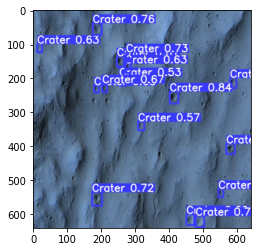

(640, 640, 3)


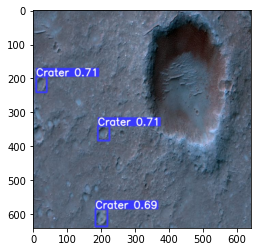

(640, 640, 3)


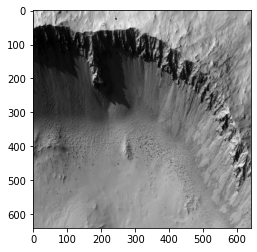

(640, 640, 3)


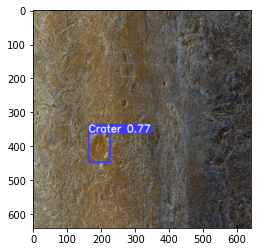

(640, 640, 3)


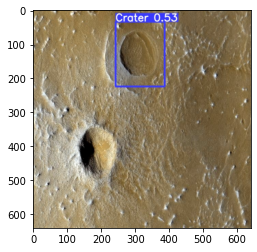

(640, 640, 3)


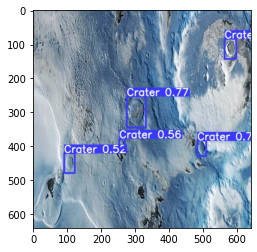

(640, 640, 3)


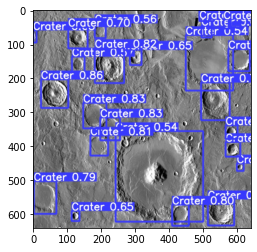

(640, 640, 3)


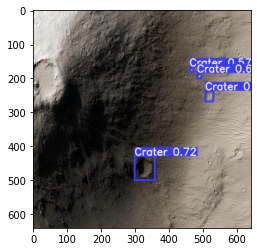

(640, 640, 3)


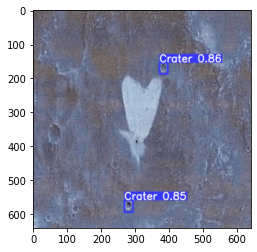

(640, 640, 3)


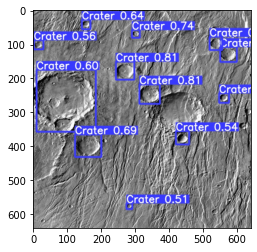

(640, 640, 3)


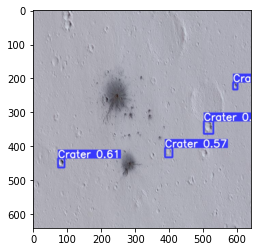

(640, 640, 3)


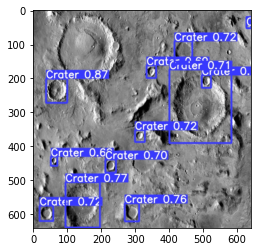

(640, 640, 3)


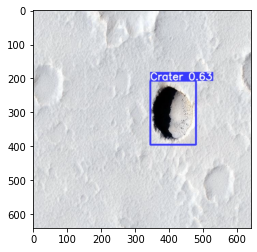

(640, 640, 3)


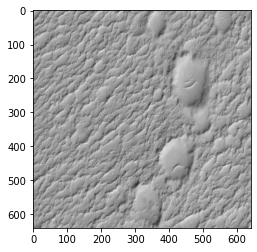

(640, 640, 3)


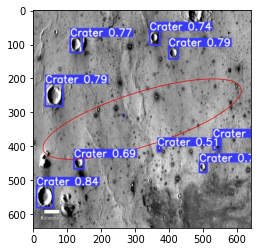

(640, 640, 3)


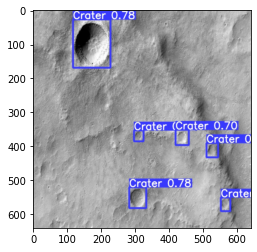

(640, 640, 3)


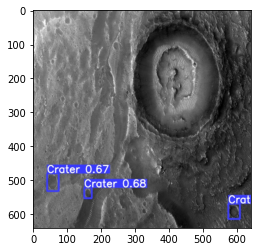

(640, 640, 3)


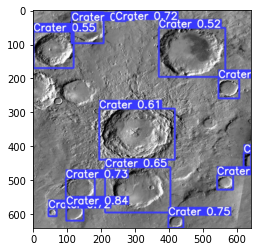

(640, 640, 3)


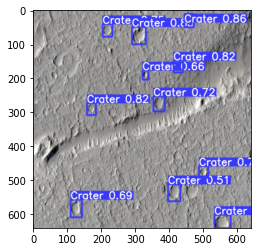

In [ ]:
import os
from IPython.display import Image
import cv2
import matplotlib.pyplot as plt


for image in os.listdir('/content/yolov5/runs/detect/exp'):
  img = cv2.imread(os.path.join('/content/yolov5/runs/detect/exp', image))
  print(img.shape)
  plt.imshow(img)
  plt.show()